Importing dependencies

In [45]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle
import kaleido

Processing data

 svid
131    19191
Name: count, dtype: int64


<Axes: xlabel='ds'>

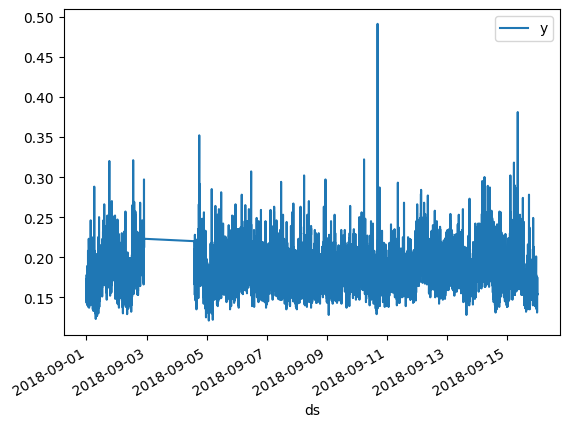

In [46]:
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', na_values=[' ', ''])

data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data[data[' svid']==131]
print(data[' svid'].value_counts())
data = data[['time_utc', ' s4']]
data.columns = ['ds', 'y']
data['y'] = data['y'].astype(float)
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
# print(data.dtypes)
# data = data[:1000]
# print(data)
# data = data[:50]

# train = data.loc[data['ds']<'2018-09-14 23:59:00']
# test = data.loc[data['ds']>='2018-09-14 23:59:00']
data.plot(x='ds', y='y')
# train

Train model

In [47]:
model = NeuralProphet()
df_train, df_test = model.split_df(data, freq='min', valid_p = 0.074)

model.fit(df_train[['ds', 'y']], freq='min ', epochs=15)
df_train

INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min 
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (139) is too small than the required number                     for the learning rate finder (256). The results might not be optimal.
Finding best initial lr: 100%|██████████| 256/256 [00:09<00:00, 28.36it/s]


Training: |          | 0/? [00:55<?, ?it/s, v_num=15, train_loss=0.0519, reg_loss=0.000, MAE=0.0166, RMSE=0.0215, Loss=0.0519, RegLoss=0.000]


ds      y
0     2018-09-01 00:00:00  0.163
1     2018-09-01 00:01:00  0.155
2     2018-09-01 00:02:00  0.154
3     2018-09-01 00:03:00  0.160
4     2018-09-01 00:04:00  0.143
...                   ...    ...
17766 2018-09-15 00:15:00  0.200
17767 2018-09-15 00:16:00  0.208
17768 2018-09-15 00:17:00  0.193
17769 2018-09-15 00:18:00  0.193
17770 2018-09-15 00:19:00  0.186

[17771 rows x 2 columns]

Predict the future

In [48]:
df_future = model.make_future_dataframe(df_train[['ds', 'y']], n_historic_predictions=True)



INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.989% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min 
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [49]:
forecast = model.predict(data[['ds', 'y']])
forecast
# plot1 = model.plot(future)  
# plot1

INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min 
INFO - (NP.df_utils._infer_frequency) - Major frequency min corresponds to 99.99% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - min 


Predicting DataLoader 0: 100%|██████████| 19/19 [00:00<00:00, 63.41it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


ds      y     yhat1     trend  season_weekly  \
0     2018-09-01 00:00:00  0.163  0.168657  0.178659      -0.006309   
1     2018-09-01 00:01:00  0.155  0.168661  0.178663      -0.006309   
2     2018-09-01 00:02:00  0.154  0.168900  0.178667      -0.006334   
3     2018-09-01 00:03:00  0.160  0.168904  0.178671      -0.006334   
4     2018-09-01 00:04:00  0.143  0.169123  0.178676      -0.006346   
...                   ...    ...       ...       ...            ...   
19186 2018-09-15 23:55:00  0.165  0.185353  0.191938      -0.002488   
19187 2018-09-15 23:56:00  0.157  0.185354  0.191939      -0.002488   
19188 2018-09-15 23:57:00  0.153  0.185603  0.191941      -0.002461   
19189 2018-09-15 23:58:00  0.154  0.185605  0.191943      -0.002461   
19190 2018-09-15 23:59:00  0.154  0.185788  0.191944      -0.002430   

       season_daily  
0         -0.003693  
1         -0.003693  
2         -0.003433  
3         -0.003433  
4         -0.003207  
...             ...  
19186     -0.004097  
19187     -0.004097  
19188     -0.003877  
19189     -0.003877  
19190     -0.003727  

[19191 rows x 6 columns]

In [50]:
model.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


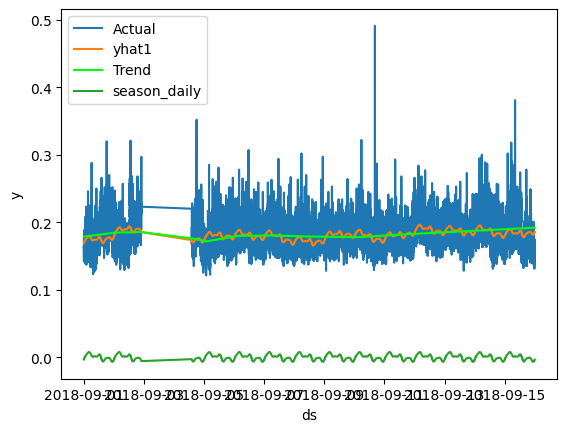

In [51]:
sns.lineplot(data=forecast, x='ds', y='y', label='Actual')
sns.lineplot(data=forecast, x='ds', y='yhat1', label='yhat1')
sns.lineplot(data=forecast, x='ds', y='trend', label='Trend', color='lime')
sns.lineplot(data=forecast, x='ds', y='season_daily', label='season_daily')
plt.show()

In [52]:
model.plot_parameters()

ERROR - (NP.plotly.plot_parameters) - plotly-resampler is not installed. Please install it to use the resampler.


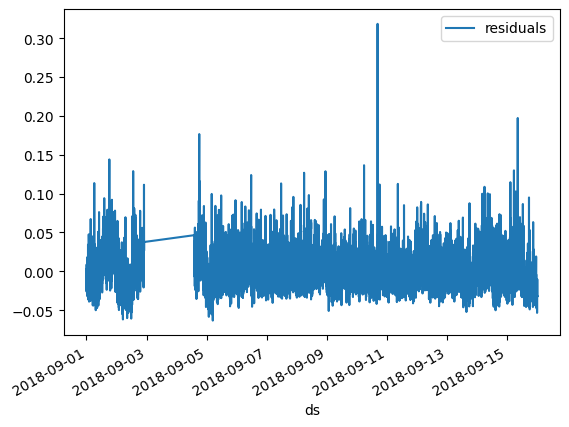

In [53]:
df_residuals = pd.DataFrame({'ds':data['ds'], 'residuals': data['y'] - forecast['yhat1']})
fig = df_residuals.plot(x='ds', y='residuals')

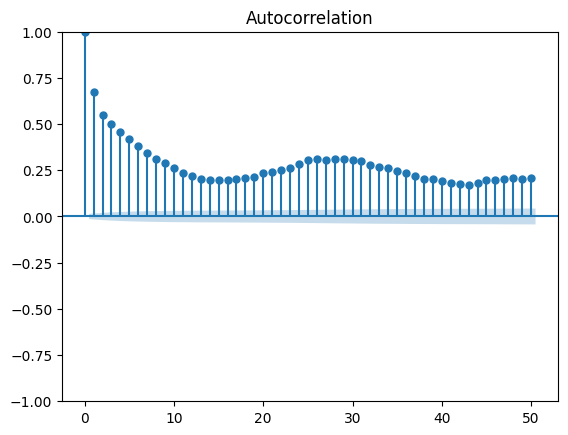

In [54]:
from statsmodels.graphics.tsaplots import plot_acf

plt = plot_acf(df_residuals['residuals'], lags=50)